# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [3]:
# your code here
from scipy.stats import uniform
uniform.rvs(1, 10, size= 50)

array([ 2.52766247,  8.89473184, 10.70466872,  2.10787943,  4.79631903,
        2.72843697,  3.23366632,  9.05472156,  4.20462025,  2.24262406,
        8.26193273,  7.63639948,  1.82600005,  9.98743635,  5.53080809,
        4.77022827,  7.19262396,  7.55228946,  9.56854687,  6.40549858,
        1.73051544,  2.69457179,  4.03504992,  7.07191942, 10.2619957 ,
        7.14837085,  1.83396015, 10.07940086,  4.40733112,  4.05044257,
        5.7480036 ,  7.72637436,  7.44791577,  2.75831958,  3.76247663,
        2.37012371,  7.26573859,  7.03156167,  2.89913169,  2.98990943,
        5.36058297,  4.07535263,  8.00735858,  2.25553905, 10.31750143,
        3.31445153,  7.48366031,  2.65705336,  2.39767299,  1.95253475])

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [39]:
# your code here
def random_generator(bottom:int, ceiling:int, count:int):
    if not all(isinstance(x, int) for x in [bottom, ceiling, count]):
        raise TypeError("All parameters should be integers")
    
    if bottom >= ceiling:
        raise ValueError("Bottom value must be smaller than ceiling value")
    
    if count < 0:
        raise ValueError("Count must be positive")
    
    return uniform.rvs(loc= bottom, scale= ceiling-bottom, size= count)

In [40]:
# your code here

# Call the function
rand_numbers1= random_generator(10, 15, 100)

# Call the function again
rand_numbers2 = random_generator(10, 60, 1000)

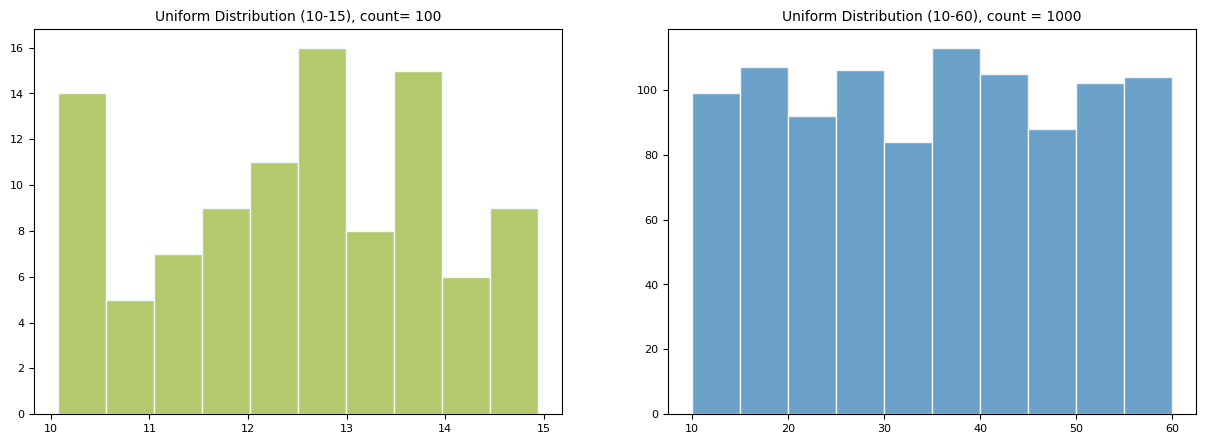

In [41]:
# your code here

# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(rand_numbers1, bins= 10, color="#b5c86b", edgecolor="#F2FAF9")
plt.title("Uniform Distribution (10-15), count= 100", fontsize= 10)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)

plt.subplot(1, 2, 2)
plt.hist(rand_numbers2, bins=10, color="#6ba1c8", edgecolor="#F0F3F2")
plt.title("Uniform Distribution (10-60), count = 1000", fontsize = 10)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.show()

How are the two distributions different?

In [ ]:
# your answer below

# The first distribution ranges from 10 to 15 and uses only 100 values, so it looks slightly uneven.
# The smaller sample size causes more visible random variation in the bars.

# The second distribution ranges from 10 to 60 and uses 1000 values, so it appears smoother.
# The larger sample size makes the uniform pattern more stable and evenly spread.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [46]:
from scipy.stats import norm 

In [47]:
# your code here

def normal_distribution(mean, std, count):
    if not(isinstance(x, ['int', 'float']) for x in [mean, std, count]):
        raise TypeError("Unsupported parameters are provided")
    
    if std <= 0 and count <= 0:
        raise ValueError("Standard deviation & count must be positive")

    return norm.rvs(loc = mean, scale = std, size = count)

In [48]:
# your code here
rand_nums_3 = normal_distribution(10, 1, 1000)

rand_nums_4 = normal_distribution(10, 50, 1000)

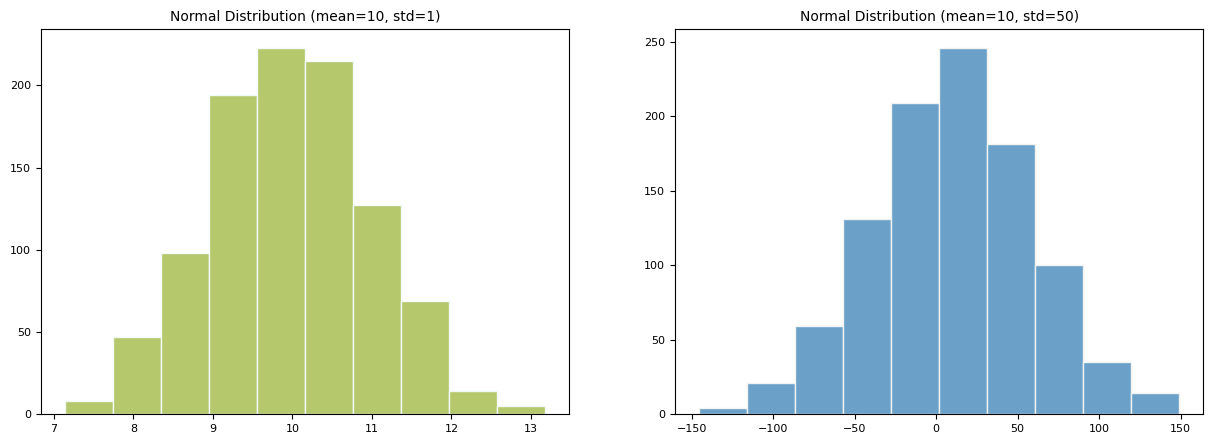

In [50]:
# your code here

# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(rand_nums_3, bins= 10, color="#b5c86b", edgecolor="#F2FAF9")
plt.title("Normal Distribution (mean=10, std=1)", fontsize= 10)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)

plt.subplot(1, 2, 2)
plt.hist(rand_nums_4, bins=10, color="#6ba1c8", edgecolor="#F0F3F2")
plt.title("Normal Distribution (mean=10, std=50)", fontsize = 10)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.show()

How are the two distributions different?

In [ ]:
# Your answer here

# Most values lie close to the mean, showing very little spread.
# Larger standard deviation wider and more spread out across the x_axis. But the shape remain in bell curve. 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [51]:
# your code here

df = pd.read_csv("vehicles.csv")
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [52]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='str')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

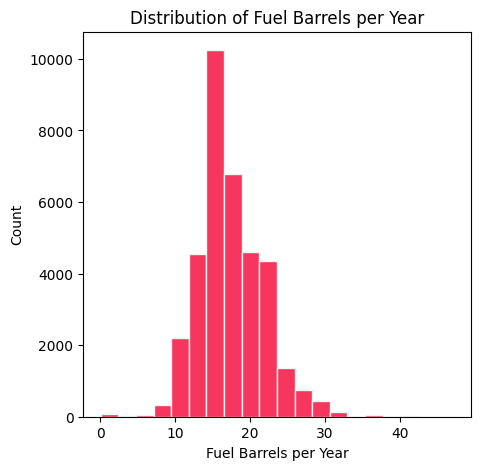

In [102]:
# your code here
plt.figure(figsize=(5,5))
plt.hist(df['Fuel Barrels/Year'], bins=20, color="#f6365c", edgecolor="#F0F3F2")
plt.xlabel("Fuel Barrels per Year")
plt.ylabel("Count")
plt.title("Distribution of Fuel Barrels per Year")
plt.show()

In [70]:
print("mean", df['Fuel Barrels/Year'].mean())
print("Median", df['Fuel Barrels/Year'].median())
print("std", df['Fuel Barrels/Year'].std())

mean 17.609055502328133
Median 17.347894736842107
std 4.467282686296914


In [ ]:
# your code here
# Seems to be normally distributed.
# However, it is not perfectly normal.
# The histogram shows a slight right skew.
# Meaning some vehicles consume much more fuel, pulling the tail to the right.

2. CO2 Emission Grams/Mile 

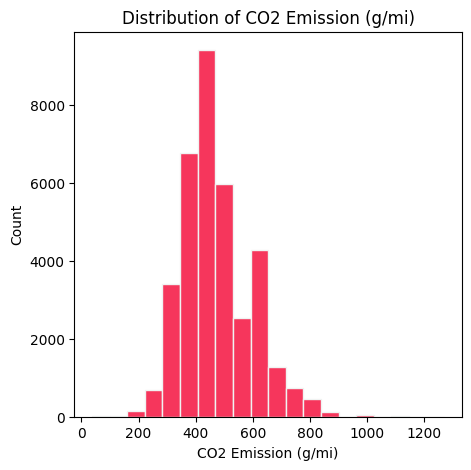

In [101]:
# your code here
plt.figure(figsize=(5,5))
plt.hist(df['CO2 Emission Grams/Mile'], bins=20, color="#f6365c", edgecolor="#F0F3F2")
plt.xlabel("CO2 Emission (g/mi)")
plt.ylabel("Count")
plt.title("Distribution of CO2 Emission (g/mi)")

plt.show()

In [72]:
print("mean", df['CO2 Emission Grams/Mile'].mean())
print("Median", df['CO2 Emission Grams/Mile'].median())
print("std", df['CO2 Emission Grams/Mile'].std())

mean 475.3163392572124
Median 467.7368421052632
std 119.06077323592496


In [ ]:
# your code here

# Not perfect normal distribution. it is right skewws means that are vechicles who carbon emissoin is greater
# most vechicles avergaley ~355-595 g/mi of co2 emmission

3. Combined MPG

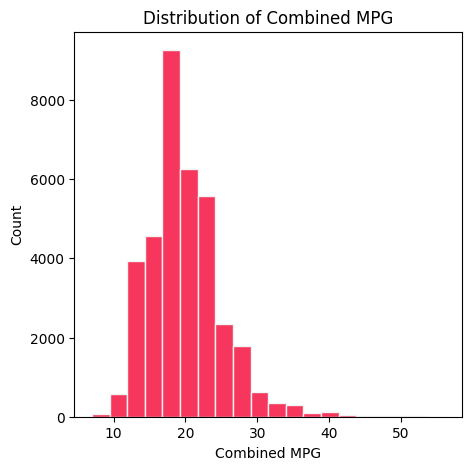

In [100]:
# your code here

plt.figure(figsize=(5,5))
plt.hist(df['Combined MPG'], bins=20, color="#f6365c", edgecolor="#F0F3F2")
plt.xlabel("Combined MPG")
plt.ylabel("Count")
plt.title("Distribution of Combined MPG")

plt.show()

In [75]:
# your code here

print("mean", df['Combined MPG'].mean())
print("Median", df['Combined MPG'].median())
print("std", df['Combined MPG'].std())

mean 19.92932242990654
Median 19.0
std 5.112408944666045


In [ ]:
# your code here
# Mean is slightly higher than the median (19), so the distribution is slightly right-skewed.

Which one(s) of the variables are nearly normally distributed? How do you know?

In [80]:
len(df.columns)

15

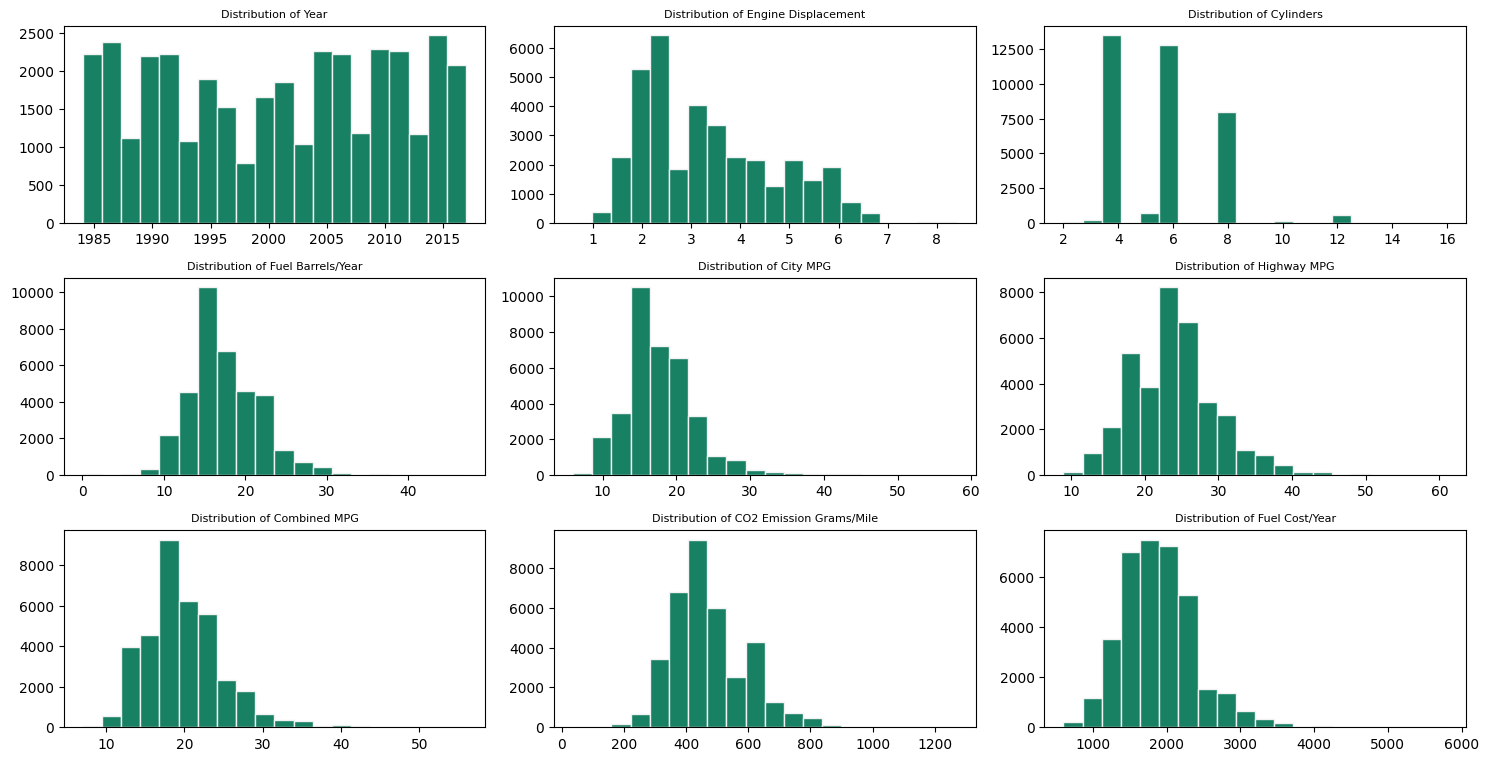

In [96]:
# your code here
num_cols = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols.columns):
    plt.subplot(4, 3, i + 1)   # index must start at 1
    plt.hist(num_cols[col], bins=20, color="#188063", edgecolor="#F0F3F2")
    plt.title(f"Distribution of {col}", fontsize=8)

plt.tight_layout()
plt.show()


None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [103]:
# your code here
def exponential_generator(count: int):
    if count <= 0:
        raise ValueError("Count must be positive")
    
    mean = 10
    return np.random.exponential(scale=mean, size=count)

In [104]:
nums_10 = exponential_generator(10)
nums_100 = exponential_generator(100)

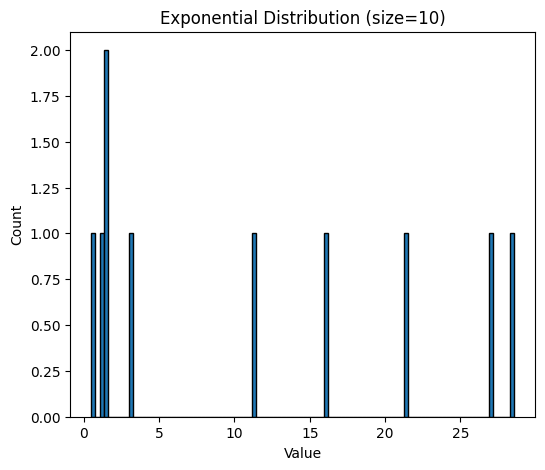

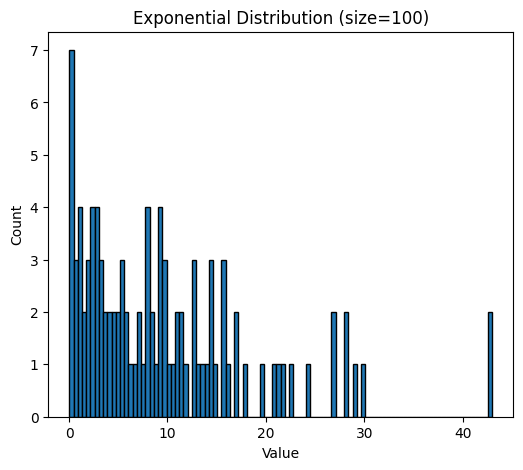

In [105]:
# ---- Plot size = 10 ----
plt.figure(figsize=(6,5))
plt.hist(nums_10, bins=100, edgecolor="black")
plt.title("Exponential Distribution (size=10)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


# ---- Plot size = 100 ----
plt.figure(figsize=(6,5))
plt.hist(nums_100, bins=100, edgecolor="black")
plt.title("Exponential Distribution (size=100)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

How are the two distributions different?

The mean changes, so the distribution changes as well. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [106]:
# your code here

lam = 1/10
x = 15

prob_less_15 = 1 - np.exp(-lam * x)
print("P(X < 15) =", prob_less_15)

P(X < 15) = 0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [108]:
# your code here
prob_more_15 = np.exp(-lam * x)
print("P(X > 15) =", prob_more_15)

P(X > 15) = 0.22313016014842982
